# 感知机算法是什么？
感知机算法只能处理二分类问题。它就是认为可以使用一个函数$f(x)=sign(wx+b)$来判断x属于哪个类。其中sign()是返回正负号的函数，w和b是需要根据所给定的样本数据进行学习得到。一般是用梯度下降来求解得到适合当前样本数据的w和b。
当模型的返回值与标签相符的时候有$(wx+b)*label>0$。当模型的返回值与标签不符的时候有$(wx+b)*label<=0$，此时模型输出错误需要利用梯度下降根据数据对w和b进行调整。如果还不了解梯度下降可以看看这两篇文章：[高中生能看懂的梯度下降是个啥？](https://zhuanlan.zhihu.com/p/43452377)，[通俗的随机梯度下降理论与实践](https://zhuanlan.zhihu.com/p/59678480)。

感知机的在分类错误时的损失函数为$L(w,b)=-(wx+b)*label$
由于梯度下降中需要求损失函数对各个参数的导数，所以我们就损失函数对各个参数进行求导。
求导的结果为：

$\frac{dL(w,b)}{dw}=-x*label\\\frac{dL(w,b)}{db}=-label$。

所以在感知机算法中梯度下降调整w与b的方法是（$\alpha$是学习率）：

$w = w + \alpha *\frac{dL(w,b)}{dw} = w + \alpha *x*label\\
b = b + \alpha *\frac{dL(w,b)}{db}=b + \alpha *label$



用伪代码表示就是：
```python
随机初始化w和b。
设置学习率alpha = 0.001
while(还有样本数据):
    1. 输入一条样本数据x，其标签为label,其中label的取值范围是{+1或-1}。
    2. 计算result = (w*x+b)*label，判断这个值是否小于0.
    3. if(result<0): #那就证明分类错误需要用梯度下降调整w和b
    4.     w = w + alpha*x*label
    5.     b = b + alpha*label
    
# 最终得到不错的w和b，此时sign(wx+b)就是我们训练好的模型。
```
# 下面是Python代码实践

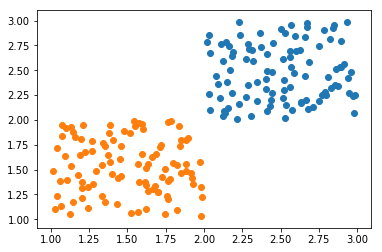

array([[ 1.63644631,  1.56041683,  1.        ],
       [ 2.53397922,  2.15200485, -1.        ],
       [ 1.61910265,  1.34878378,  1.        ],
       [ 1.38395069,  1.57205827,  1.        ],
       [ 2.40370965,  2.41096131, -1.        ],
       [ 1.2074177 ,  1.95057422,  1.        ],
       [ 1.84393566,  1.73642156,  1.        ],
       [ 1.52164348,  1.0624394 ,  1.        ],
       [ 2.66835539,  2.20507588, -1.        ],
       [ 1.4023369 ,  1.45445216,  1.        ],
       [ 2.15270493,  2.37936778, -1.        ],
       [ 1.33604892,  1.23208982,  1.        ],
       [ 2.11064204,  2.76420307, -1.        ],
       [ 1.92231898,  1.41869807,  1.        ],
       [ 2.5727606 ,  2.09838412, -1.        ],
       [ 1.45736401,  1.43556259,  1.        ],
       [ 2.36354776,  2.87613052, -1.        ],
       [ 2.56458356,  2.95968325, -1.        ],
       [ 2.83874992,  2.92253851, -1.        ],
       [ 1.76722165,  1.97739254,  1.        ],
       [ 1.06514369,  1.13781358,  1.   

In [62]:
import numpy as np

# 加载测试数据，我自己构造两种类的数据
def generateData():
    # 类别0与类别1的中心
    center0 = np.array([2,2])
    center1 = np.array([1,1])
    data_size = 200
    
    data = np.zeros((data_size,3))
    
    # 类别0与类别1的数据
    data[:data_size//2, 0:2] = center0 + np.random.random((data_size//2,2))
    data[:data_size//2, -1] = -1
    data[data_size//2:, 0:2] = center1 + np.random.random((data_size - data_size//2,2))
    data[data_size//2:, -1] = 1
    np.random.shuffle(data)
    return data

data = generateData()
# 绘制数据分布
import matplotlib.pyplot as plt
plt.scatter(data[data[:,-1]==-1,0],data[data[:,-1]==-1,1])
plt.scatter(data[data[:,-1]==1,0],data[data[:,-1]==1,1])
plt.show()
data

In [177]:

w = np.random.random((2,))
b = np.random.random()
alpha = 0.01
for _ in range(10):# 重复训练10次,如果只训练1次由于是随机初始化w与b所以一般准确率在70%~100%之间波动
    for item in data:
        x = item[0:-1]
        label = item[-1]
        predict_result = label*(np.dot(x,w)+b);

        # 预测错误则用梯度下降更新w与b
        if predict_result<=0:
            w = w + alpha*x*label
            b = b + alpha*label

predict =np.sign( np.matmul(data[:,0:2],w) + b);
print("准确率：",np.sum(predict==data[:,-1])/data.shape[0]*100.0,"%")


准确率： 100.0 %
